In [2]:
import numpy as np
%matplotlib inline

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

In [196]:
from sys import path
path.append('/home/flo/cfs/CFS/share/python')
from hdf5_tools import get_result, get_coordinates, get_step_values, get_centroids

(1.548183917680307e-05, 1.8399495828590514e-05, 0.01714999727810486)

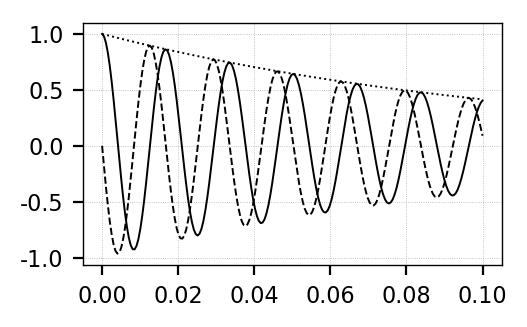

In [15]:
cp = 1005.4 
cv = 1005.4/1.4
rho = 1.205
K = 1.41767e5
nu = 1.506e-5
k = 1005.4*1.205*1.506e-5/0.708

f = 20e+3
omega = 2*np.pi*f

deltaV = np.sqrt(2*nu/omega)
deltaT = np.sqrt(2*k/(omega*rho*cp))
c = np.sqrt(K/rho)
lam = c/f

# analytic wave number
k0 = (omega/c)#**2
R = 0.001 # radius
L = 0.10 # length of the slit
w = 0.5e-3 # width of the slit
h = 100*w # height of the slit (i.e. 2d model thickness)
S = w*h # area of the boundary
U = 2*(w+h) # circumference of the boundary

k = k0*np.sqrt((2*S-deltaT*(1j-1)*(cp/cv-1)*U)/(2*S+deltaV*(1j-1)*U))

z = np.linspace(0,L,200) #X[I,2]
p = np.exp(-1j*k*z)
fig,ax = plt.subplots()
l, = ax.plot(z,p.real,'k')
ax.plot(z,p.imag,'--',color=l.get_color())
ax.plot(z,np.abs(p),':',color=l.get_color())

deltaV,deltaT,lam

In [25]:
1005.4*1.205*1.506e-5/0.708,25.87/1000

(0.025770191271186446, 0.02587)

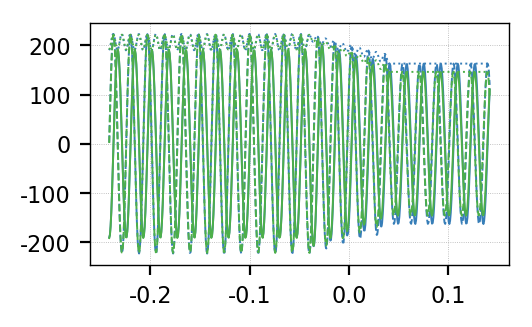

In [76]:
step = 3

fig,ax = plt.subplots()

h5 = 'results_hdf5/acou.cfs'
regions = ['S_b','S_visco','S_t']
X = np.vstack([get_coordinates(h5,reg) for reg in regions])
P = np.hstack([get_result(h5,'acouPressure',reg,step=step) for reg in regions])
# secect the ones in the center
I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
Is = np.argsort(X[I,1])
I = I[Is]
ya = X[I,1]
pa = P[I]

l, = ax.plot(ya,pa.real)
ax.plot(ya,pa.imag,'--',color=l.get_color())
ax.plot(ya,np.abs(pa),':',color=l.get_color())

h5 = 'results_hdf5/acou-thermal.cfs'
regions = ['S_b','S_visco','S_t']
X = np.vstack([get_coordinates(h5,reg) for reg in regions])
P = np.hstack([get_result(h5,'acouPressure',reg,step=step) for reg in regions])
# secect the ones in the center
I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
Is = np.argsort(X[I,1])
I = I[Is]
ya = X[I,1]
pa = P[I]

l, = ax.plot(ya,pa.real)
ax.plot(ya,pa.imag,'--',color=l.get_color())
ax.plot(ya,np.abs(pa),':',color=l.get_color())

(-0.1, 0.1)

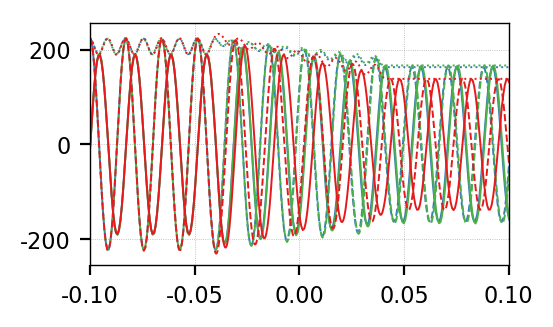

In [73]:
step = 3

fig,ax = plt.subplots()

h5 = 'results_hdf5/acou.cfs'
regions = ['S_b','S_visco','S_t']
X = np.vstack([get_coordinates(h5,reg) for reg in regions])
P = np.hstack([get_result(h5,'acouPressure',reg,step=step) for reg in regions])
# secect the ones in the center
I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
Is = np.argsort(X[I,1])
I = I[Is]
ya = X[I,1]
pa = P[I]

l, = ax.plot(ya,pa.real)
ax.plot(ya,pa.imag,'--',color=l.get_color())
ax.plot(ya,np.abs(pa),':',color=l.get_color())

h5 = 'results_hdf5/visco.cfs'
X = np.vstack([get_coordinates(h5,'S_visco'),get_coordinates(h5,'S_b'),get_coordinates(h5,'S_t')])
P = np.hstack([get_result(h5,'fluidMechPressure','S_visco',step=step),\
               get_result(h5,'acouPressure','S_b',step=step),\
               get_result(h5,'acouPressure','S_t',step=step),\
              ])
I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
Is = np.argsort(X[I,1])
I = I[Is]
yv = X[I,1]
pv = P[I]

l, = ax.plot(yv,pv.real)
ax.plot(yv,pv.imag,'--',color=l.get_color())
ax.plot(yv,np.abs(pv),':',color=l.get_color())

h5 = 'results_hdf5/visco-thermal.cfs'
X = np.vstack([get_coordinates(h5,'S_visco'),get_coordinates(h5,'S_b'),get_coordinates(h5,'S_t')])
P = np.hstack([get_result(h5,'fluidMechPressure','S_visco',step=step),\
               get_result(h5,'acouPressure','S_b',step=step),\
               get_result(h5,'acouPressure','S_t',step=step),\
              ])
I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
Is = np.argsort(X[I,1])
I = I[Is]
yvt = X[I,1]
pvt = P[I]

l, = ax.plot(yvt,pvt.real)
ax.plot(yvt,pvt.imag,'--',color=l.get_color())
ax.plot(yvt,np.abs(pvt),':',color=l.get_color())

ax.set_xlim(-0.1,0.1)

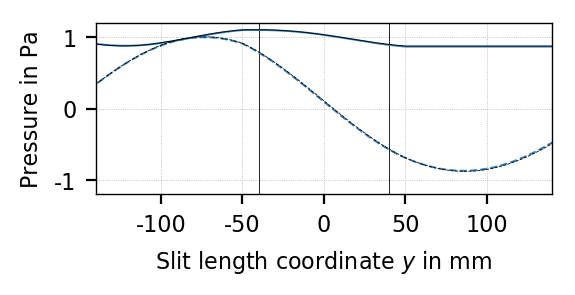

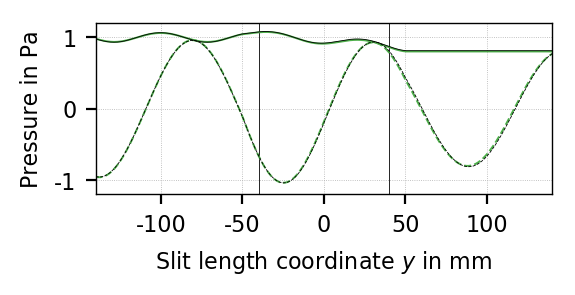

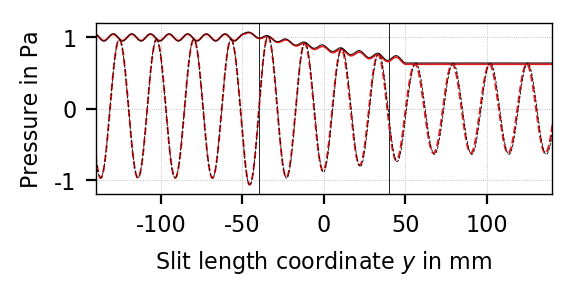

In [227]:

steps  = [1,2,8]
for i,step in enumerate(steps):
    fig,ax = plt.subplots(figsize=[2.7,1.3])
    h5 = 'results_hdf5/acou-thermal.cfs'
    regions = ['S_b','S_visco','S_t']
    X = np.vstack([get_coordinates(h5,reg) for reg in regions])
    P = np.hstack([get_result(h5,'acouPressure',reg,step=step) for reg in regions])
    f = get_step_values(h5)[0]
    # secect the ones in the center
    I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
    Is = np.argsort(X[I,1])
    I = I[Is]
    ya = X[I,1]
    pa = P[I]

    l, = ax.plot(ya*1000,pa.real,'--',color=color_cycle.by_key()['color'][i])
    #ax.plot(ya,pa.imag,'--',color=l.get_color())
    ax.plot(ya*1000,np.abs(pa),'-',label='visco-thermal',color=l.get_color())

    h5 = 'results_hdf5/visco-thermal.cfs'
    X = np.vstack([get_coordinates(h5,'S_visco'),get_coordinates(h5,'S_b'),get_coordinates(h5,'S_t')])
    P = np.hstack([get_result(h5,'fluidMechPressure','S_visco',step=step),\
                   get_result(h5,'acouPressure','S_b',step=step),\
                   get_result(h5,'acouPressure','S_t',step=step),\
                  ])
    I = np.argwhere(np.abs(X[:,0])<1e-12).ravel()
    Is = np.argsort(X[I,1])
    I = I[Is]
    yvt = X[I,1]
    pvt = P[I]

    l, = ax.plot(yvt*1000,pvt.real,'--k',lw=0.3)
    #ax.plot(yvt,pvt.imag,'--',color=l.get_color())
    ax.plot(yvt*1000,np.abs(pvt),'-',label='acoustic BL',color=l.get_color(),lw=0.3)
    
    ax.set_ylim(np.linspace(-1,1,2)*1.2)
    ax.vlines(np.array([-40e-3,40e-3])*1000,*ax.get_ylim(),lw=0.3)
    ax.set_xlim(-140,140)
    

    ax.set_ylabel('Pressure in Pa')
    ax.set_xlabel('Slit length coordinate $y$ in mm')
    fig.tight_layout(pad=0.1)
#ax.set_xlim(-0.3,0.3)
    #ax.legend(loc=4)
    fig.savefig('pressure-y_%.0fkHz.pdf'%(f[step-1]/1000))

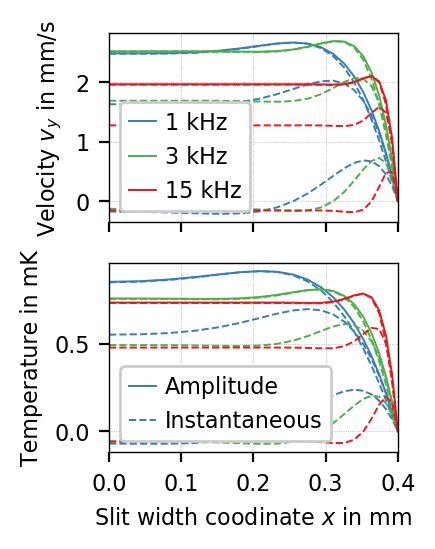

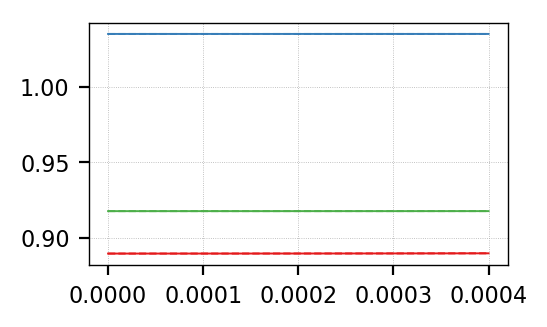

In [261]:

h5 = 'results_hdf5/visco-thermal.cfs'
X = get_coordinates(h5,'S_visco')
P = get_result(h5,'fluidMechPressure','S_visco',step=steps)
V = get_result(h5,'fluidMechVelocity','S_visco',step=steps)
T = get_result(h5,'heatTemperature','S_visco',step=steps)
I = np.argwhere(np.abs(X[:,1])<1e-12).ravel()
Is = np.argsort(X[I,0])
I = I[Is]
xvt = X[I,0]
vvt = V[:,I,:]
pvt = P[:,I]
tvt = T[:,I]

h5 = 'results_hdf5/acou-thermal.cfs'
C = get_centroids(h5,'S_visco')
V = get_result(h5,'acouVelocity','S_visco',step=steps)
I = np.argwhere(np.abs(C[:,1]-np.min(np.abs(C[:,1])))<1e-9).ravel()
Is = np.argsort(C[I,0])
xvta = C[I,0]
vvta = V[:,I,:]

fig,axs = plt.subplots(figsize=[2.0,2.6],nrows=2,sharex=True)
ax = axs[0]
for i,vt in enumerate(vvt[:,:,1]):
    Im = np.argmax(np.abs(vt))
    l, = ax.plot(xvt*1000,np.abs(vt)*1000,label='%.0f kHz'%(f[steps[i]-1]/1000) )
    shift = np.angle(vt[np.argmax(np.abs(vt))])
    for phi in np.linspace(0,np.pi/2,3):
        l2,= ax.plot(xvt*1000,( vt*np.exp(-1j*(shift+phi) ) ).real*1000,'--',color=l.get_color() )
    #ax.plot(xvta*1000,np.abs(vvta[i,:,1])*1000,'x',lw=0.3,ms=2,color=l.get_color() )
#ax.set_ylim(0)
ax.set_xlim(0,0.4)
ax.legend(handlelength=1.2,handletextpad=0.4)
#ax.set_xlabel('Slit width coodinate $x$ in mm')
ax.set_ylabel('Velocity $v_y$ in mm/s')

#fig,ax = plt.subplots()
ax = axs[1]
for i,vt in enumerate(tvt):
    Im = np.argmax(np.abs(vt))
    l, = ax.plot(xvt*1000,np.abs(vt)*1000 )
    shift = np.angle(vt[np.argmax(np.abs(vt))])
    for phi in np.linspace(0,np.pi/2,3):
        l2,= ax.plot(xvt*1000,( vt*np.exp(-1j*(shift+phi) ) ).real*1000,'--',color=l.get_color() )
    if i==0:
        l.set_label('Amplitude')
        l2.set_label('Instantaneous')
#ax.set_ylim(0)
ax.set_xlim(0,0.4)
ax.legend(handlelength=1.2,handletextpad=0.4)
ax.set_xlabel('Slit width coodinate $x$ in mm')
ax.set_ylabel('Temperature in mK')
fig.tight_layout(pad=0.1)
fig.savefig('Slit_visco-thermal_V-T-profiles.pdf')

fig,ax = plt.subplots()
for vt in pvt:
    Im = np.argmax(np.abs(vt))
    l, = ax.plot(xvt,np.abs(vt) )
    ax.plot(xvt,( vt*np.exp(-1j*np.angle(vt[0]) ) ).real,'--',color=l.get_color() )


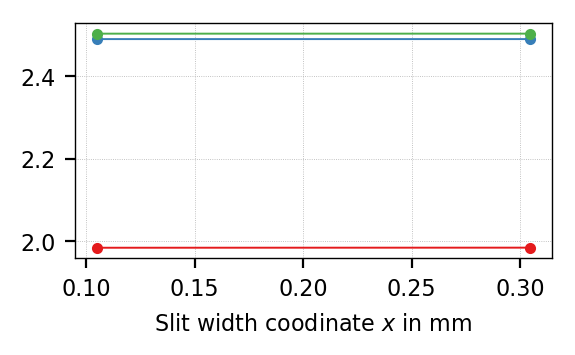

In [210]:
h5 = 'results_hdf5/acou-thermal.cfs'
C = get_centroids(h5,'S_visco')
V = get_result(h5,'acouVelocity','S_visco',step=steps)
I = np.argwhere(np.abs(C[:,1]-np.min(np.abs(C[:,1])))<1e-9).ravel()
Is = np.argsort(C[I,0])

xvt = C[I,0]
vvt = V[:,I,:]

fig,ax = plt.subplots()
#ax = axs[1]
for i,vt in enumerate(vvt[:,:,1]):
    Im = np.argmax(np.abs(vt))
    l, = ax.plot(xvt*1000,np.abs(vt)*1000,'.-' )
    #l2,= ax.plot(xvt*1000,( vt*np.exp(-1j*np.angle(vt[0]) ) ).real*1000,'--',color=l.get_color() )

ax.set_xlabel('Slit width coodinate $x$ in mm')

fig.tight_layout(pad=0.1)